# Regresión Lineal - Método Gradiente Descendente

In [133]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets

In [134]:
# n_puntos determina la cantidad de datos con los que se trabajara
n_puntos = 100
# valores de inicio
a=1
b=1
aprendizaje = 0.1
ciclos = 100
# h_presicion determina los decimales qeu se mostrara
h_presicion = 6
np.set_printoptions(precision=h_presicion)
xi, yi = datasets.make_regression(n_samples=n_puntos, n_features=1, noise=20)
xi = np.array(xi,dtype=float)
yi = np.array(yi, dtype=float)
xi= np.hstack(xi) # cambio de dimesion del array


## FuncionesMétodo Gradiente Descendente

In [135]:
def coste(xi, yi, a, b):
    n = len(xi)
    error = 0.0
    for i in range(n):
        hipotesis = a+b*xi[i]
        error +=  (yi[i] - hipotesis) ** 2
    return error / (2*n)

In [136]:
def GradienteDescendente(xi, yi, a, b, aprendizaje, ciclos):
    archivo = open("Practica_02.txt",'w')
    archivo.write('\n ================ PRACTICA 01 - INTELIGENCIA ARTIFICIAL ================ \n')
    archivo.write('PRESENTADO POR : Heberth del Carpio Maraza\n')
    archivo.writelines('PRACTICA 02    : Metodo Gradiente Descendente.\n')
    archivo.write('\n====  DATOS === \n')
    archivo.write('Variable Independiente  X : \n')
    archivo.write(str(xi) + '\n')
    archivo.write('Variable Dependiente Y : \n')
    archivo.write(str(yi) + '\n')
    m = len(xi)
    hist_coste = []
    for c in range(ciclos):
        archivo.write('\n \n Iteracion :' + str(c) )
        b_deriv = 0
        a_deriv = 0
        archivo.write('\n Intercepto anterior : ' + str(np.around(a,h_presicion)))
        archivo.write('\n Pendiente anterior : ' + str(np.around(b,h_presicion)))
        archivo.write('\n Tasa de aprendizaje :' + str(np.around(aprendizaje,h_presicion)))
        for i in range(m):
            
            hipotesis = a+b*xi[i]
            a_deriv += hipotesis - yi[i]
            b_deriv += (hipotesis - yi[i]) * xi[i]
            hist_coste.append(coste(xi, yi, a, b))
        a -= (a_deriv / m) * aprendizaje
        b -= (b_deriv / m) * aprendizaje
        archivo.write('\n Intercepto actual : ' + str(np.around(a,h_presicion)))
        archivo.write('\n Pendiente actual : ' + str(np.around(b,h_presicion)))
        archivo.write('\n Derivada de interccepto :' + str(np.around(a_deriv,h_presicion)))
        archivo.write('\n Derivada de pendiente :' + str(np.around(b_deriv,h_presicion)))
    archivo.write('\n\n\n Ec. Optima :' + str(np.around(a,h_presicion)) + ' + ' + str(np.around(b,h_presicion))+ 'x')
    return a, b, hist_coste

## Inicio

In [137]:
w0, w1, hist_coste = GradienteDescendente(xi, yi, a, b, aprendizaje, ciclos)


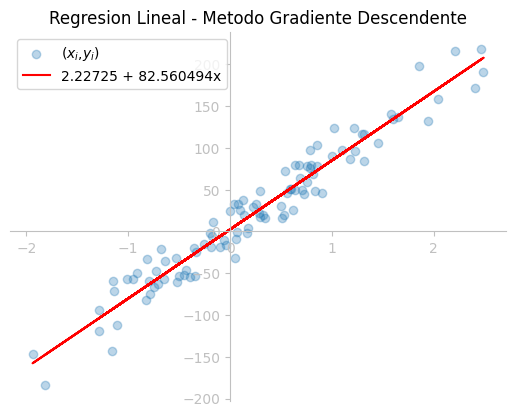

In [138]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(xi, yi,alpha=0.3, label ='($x_i$,$y_i$)')
ax.spines['left'].set_position('zero')
ax.spines['left'].set_color('silver')
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_color('silver')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='y', colors='silver')
ax.tick_params(axis='x', colors='silver')
plt.plot(xi , w0 + w1*xi, label= str(np.around(w0,h_presicion)) + ' + ' + str(np.around(w1,h_presicion)) +'x', color ='red')
plt.legend()
plt.title('Regresion Lineal - Metodo Gradiente Descendente')
plt.show()
